In [18]:
import pandas as pd
file_path = "./ref/대전교통공사_시간대별 승하차인원_20250131.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head()

,날짜,역번호,역명,구분,03-04시,04-05시,05-06시,06-07시,07-08시,08-09시,...,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-00시,00-01시,01-02시,02-03시
0,2025-01-01,1101,판암,승차,0,0,45,38,57,112,...,145,102,69,63,30,34,15,0,0,0
1,2025-01-01,1101,판암,하차,0,0,22,51,39,52,...,182,138,103,99,99,84,37,16,0,0
2,2025-01-01,1102,신흥,승차,0,0,13,15,24,52,...,82,54,28,22,13,18,2,0,0,0
3,2025-01-01,1102,신흥,하차,0,0,12,28,26,26,...,79,63,51,71,43,41,29,1,0,0
4,2025-01-01,1103,대동,승차,0,0,32,41,60,88,...,116,87,65,64,49,37,20,0,0,0


In [19]:
columns0 = ['date', 'num', 'name', 'type']
time_col = [f"{i}~{i+1}H" for i in range(1, 24)]
columns = columns0 + time_col + ['24~01H']
df.columns = columns[:len(df.columns)] 

valid_time_col = [col for col in time_col if col in df.columns]
df['total'] = df[valid_time_col].sum(axis=1)
df = df.loc[:, :'total']

In [20]:
import matplotlib.pyplot as plt

data = df.groupby(['date', 'num', 'name']).sum().reset_index()
total_data = data[data['date'] == '2025-01-01']

In [22]:
df.head()

,date,num,name,type,1~2H,2~3H,3~4H,4~5H,5~6H,6~7H,...,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,24~01H,total
0,2025-01-01,1101,판암,승차,0,0,45,38,57,112,...,102,69,63,30,34,15,0,0,0,1998
1,2025-01-01,1101,판암,하차,0,0,22,51,39,52,...,138,103,99,99,84,37,16,0,0,1853
2,2025-01-01,1102,신흥,승차,0,0,13,15,24,52,...,54,28,22,13,18,2,0,0,0,870
3,2025-01-01,1102,신흥,하차,0,0,12,28,26,26,...,63,51,71,43,41,29,1,0,0,824
4,2025-01-01,1103,대동,승차,0,0,32,41,60,88,...,87,65,64,49,37,20,0,0,0,1601


In [23]:
data = df.groupby(['num','name','date']).sum().reset_index()
data[data['date']=='2025-01-01']
data

,num,name,date,type,1~2H,2~3H,3~4H,4~5H,5~6H,6~7H,...,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,24~01H,total
0,1101,판암,2025-01-01,승차하차,0,0,67,89,96,164,...,240,172,162,129,118,52,16,0,0,3851
1,1101,판암,2025-01-02,승차하차,0,0,93,216,573,915,...,829,298,248,222,187,78,24,0,0,7705
2,1101,판암,2025-01-03,승차하차,0,0,100,202,589,873,...,900,351,252,243,227,104,19,0,0,7918
3,1101,판암,2025-01-04,승차하차,0,0,66,122,199,362,...,345,245,207,222,161,84,32,0,0,5954
4,1101,판암,2025-01-05,승차하차,0,1,48,79,103,233,...,224,195,163,145,110,44,39,0,0,4083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1122,반석,2025-01-27,승차하차,0,0,59,132,241,348,...,625,390,368,418,411,228,39,0,0,7976
678,1122,반석,2025-01-28,승차하차,0,0,78,126,195,246,...,396,303,260,232,230,135,16,0,0,5723
679,1122,반석,2025-01-29,승차하차,0,0,48,106,171,209,...,323,288,232,194,182,140,21,0,0,4412
680,1122,반석,2025-01-30,승차하차,0,0,44,83,124,155,...,448,345,344,347,302,182,23,0,0,6042


In [24]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
372,갈마,2025-01-01,3290
373,갈마,2025-01-02,5549
374,갈마,2025-01-03,6650
375,갈마,2025-01-04,5080
376,갈마,2025-01-05,3591
377,갈마,2025-01-06,5745
378,갈마,2025-01-07,5689
379,갈마,2025-01-08,5737
380,갈마,2025-01-09,5586
381,갈마,2025-01-10,5716


In [27]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,갈마,160283
1,갑천,51286
2,구암,158572
3,노은,231358
4,대동,185583
5,대전,623933
6,반석,368628
7,서대전네거리,299125
8,시청,413743
9,신흥,95165


In [28]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
5,대전,623933
14,유성온천,516499
8,시청,413743
17,중앙로,377921
6,반석,368628
11,용문,355268
15,정부청사,348824
7,서대전네거리,299125
19,탄방,238994
3,노은,231358


In [29]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2coding"

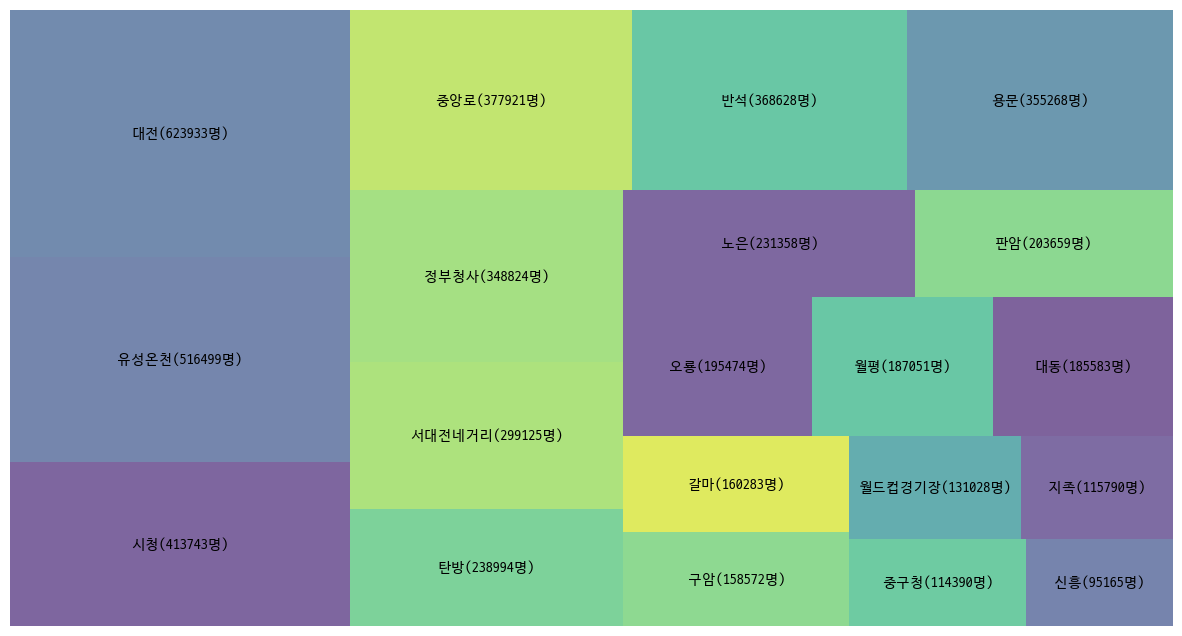

In [33]:
import squarify

plt.figure(figsize=(15,8))
squarify.plot(sizes=total_data['total'], label=[f"{x[0]}({x[1]}명)" for x in zip(total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size'] = 9
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()